In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("current dir",os.getcwd())

current dir c:\Users\laksh\projects\leaf_disease_detection


In [4]:
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")

In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",)

Found 300 files belonging to 3 classes.


In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [10]:
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [12]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3799 - loss: 1.4660 - val_accuracy: 0.6333 - val_loss: 0.7398
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6765 - loss: 0.7223 - val_accuracy: 0.4500 - val_loss: 1.6552
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6102 - loss: 0.9225 - val_accuracy: 0.7467 - val_loss: 0.5828
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7611 - loss: 0.5184 - val_accuracy: 0.8367 - val_loss: 0.3381
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8961 - loss: 0.2913 - val_accuracy: 0.9233 - val_loss: 0.2021
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9140 - loss: 0.2289 - val_accuracy: 0.9333 - val_loss: 0.1688
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9233 - loss: 0.1890 - val_accuracy: 0.9333 - val_loss: 0.2100
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9345 - loss: 0.1923 - val_accuracy: 0.6233 - val_loss:

In [16]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.9562 - loss: 0.0974
Training accuracy: 0.9700000286102295


In [17]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.9583 - loss: 0.1199
Validation accuracy: 0.9466666579246521


In [18]:
cnn.save('trained_plant_disease_model.keras')

In [19]:
training_history.history

{'accuracy': [0.44555556774139404,
  0.7099999785423279,
  0.6877777576446533,
  0.7977777719497681,
  0.903333306312561,
  0.9111111164093018,
  0.9344444274902344,
  0.9388889074325562,
  0.8666666746139526,
  0.9266666769981384],
 'loss': [1.1712684631347656,
  0.6471049785614014,
  0.7213584184646606,
  0.44462069869041443,
  0.25941309332847595,
  0.22724531590938568,
  0.16922518610954285,
  0.16873732209205627,
  0.32999661564826965,
  0.18516463041305542],
 'val_accuracy': [0.6333333253860474,
  0.44999998807907104,
  0.746666669845581,
  0.8366666436195374,
  0.9233333468437195,
  0.9333333373069763,
  0.9333333373069763,
  0.6233333349227905,
  0.9066666960716248,
  0.9466666579246521],
 'val_loss': [0.7397692203521729,
  1.6551986932754517,
  0.5827846527099609,
  0.338146835565567,
  0.20214413106441498,
  0.16880013048648834,
  0.21002334356307983,
  1.159723162651062,
  0.29497677087783813,
  0.1418488323688507]}

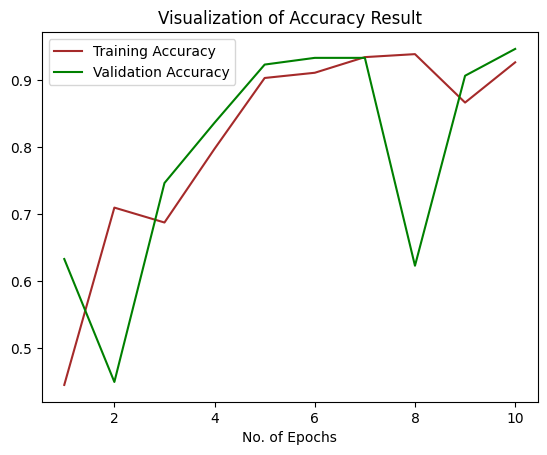

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()